# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd

# Select the resource to download
resource_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

response = requests.get(resource_url, time.sleep(20), headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"})

# If the request has been executed correctly (code 200), then the HTML content of the page has been downloaded
if response:
    soup = BeautifulSoup(response.text, 'html')
    soup
else:
    print(f"connection failed {response.status_code}")

tables = soup.find_all("table")





In [2]:
#Obteniendo los valores en listas
dates = []
values = []
for table in tables:
    if re.search(r'Tesla Quarterly Revenue', table.text):
        TR = table.findAll('tr')
        for tr in TR:
            TD = tr.findAll('td')
            x = 0
            for td in TD:
                if x == 0:
                    dates.append(td.text)
                    x += 1
                else:
                    values.append((td.text))
        break
print(f"{dates} \n {values}")

    


['2024-09-30', '2024-06-30', '2024-03-31', '2023-12-31', '2023-09-30', '2023-06-30', '2023-03-31', '2022-12-31', '2022-09-30', '2022-06-30', '2022-03-31', '2021-12-31', '2021-09-30', '2021-06-30', '2021-03-31', '2020-12-31', '2020-09-30', '2020-06-30', '2020-03-31', '2019-12-31', '2019-09-30', '2019-06-30', '2019-03-31', '2018-12-31', '2018-09-30', '2018-06-30', '2018-03-31', '2017-12-31', '2017-09-30', '2017-06-30', '2017-03-31', '2016-12-31', '2016-09-30', '2016-06-30', '2016-03-31', '2015-12-31', '2015-09-30', '2015-06-30', '2015-03-31', '2014-12-31', '2014-09-30', '2014-06-30', '2014-03-31', '2013-12-31', '2013-09-30', '2013-06-30', '2013-03-31', '2012-12-31', '2012-09-30', '2012-06-30', '2012-03-31', '2011-12-31', '2011-09-30', '2011-06-30', '2011-03-31', '2010-12-31', '2010-09-30', '2010-06-30', '2010-03-31', '2009-12-31', '2009-09-30', '2009-06-30'] 
 ['$25,182', '$25,500', '$21,301', '$25,167', '$23,350', '$24,927', '$23,329', '$24,318', '$21,454', '$16,934', '$18,756', '$17,71

In [ ]:
#Preparando el dataframe

df = pd.DataFrame(zip(dates,values),columns=["Date","Value"])
print(f"Dataframe sin preparar \n{df}")
df = df.map(lambda x: None if x == "" else x)
df.dropna(how = "any", inplace= True)
df["Value"] = df["Value"].str.replace("$", "", regex=False).str.replace(",","",regex=False).astype(int)
print(f"dataframe despues de ser procesado \n{df}")

Dataframe sin preparar 
          Date    Value
0   2024-09-30  $25,182
1   2024-06-30  $25,500
2   2024-03-31  $21,301
3   2023-12-31  $25,167
4   2023-09-30  $23,350
..         ...      ...
57  2010-06-30      $28
58  2010-03-31      $21
59  2009-12-31         
60  2009-09-30      $46
61  2009-06-30      $27

[62 rows x 2 columns]
dataframe despues de ser procesado 
          Date  Value
0   2024-09-30  25182
1   2024-06-30  25500
2   2024-03-31  21301
3   2023-12-31  25167
4   2023-09-30  23350
..         ...    ...
56  2010-09-30     31
57  2010-06-30     28
58  2010-03-31     21
60  2009-09-30     46
61  2009-06-30     27

[61 rows x 2 columns]


### Creación de las bases de datos

SQLite

In [4]:
#Usando de SQLite3
con = sqlite3.connect('tesla.db')

cur = con.cursor()

# Create table
try:
    cur.execute('''CREATE TABLE revenue
               (date text, value real)''')
except:
    print("Archivo ya creado")




Archivo ya creado


In [5]:
tesla_tuples = list(df.to_records(index = False))
cur.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
con.commit()

In [6]:

#Consultas para verificar que la conexión funciona 
db_results = pd.read_sql_query("SELECT * FROM quarter_rev", con)
print(db_results)

db_results = pd.read_sql_query("SELECT * FROM quarter_rev WHERE Value > 15000", con)
print(db_results)


          Date  Value
0   2024-09-30  25182
1   2024-06-30  25500
2   2024-03-31  21301
3   2023-12-31  25167
4   2023-09-30  23350
..         ...    ...
56  2010-09-30     31
57  2010-06-30     28
58  2010-03-31     21
59  2009-09-30     46
60  2009-06-30     27

[61 rows x 2 columns]
          Date  Value
0   2024-09-30  25182
1   2024-06-30  25500
2   2024-03-31  21301
3   2023-12-31  25167
4   2023-09-30  23350
5   2023-06-30  24927
6   2023-03-31  23329
7   2022-12-31  24318
8   2022-09-30  21454
9   2022-06-30  16934
10  2022-03-31  18756
11  2021-12-31  17719


### Visualizaciones

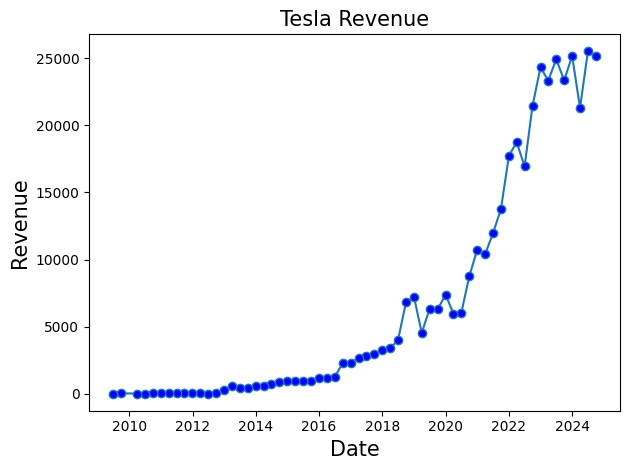

In [10]:
#Time series line plot
df['Date'] = pd.to_datetime(df['Date'])
plt.title('Tesla Revenue', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Revenue', fontsize=15)

plt.plot(df['Date'], df['Value'], marker = 'o', markerfacecolor='blue')
plt.tight_layout()
plt.show()


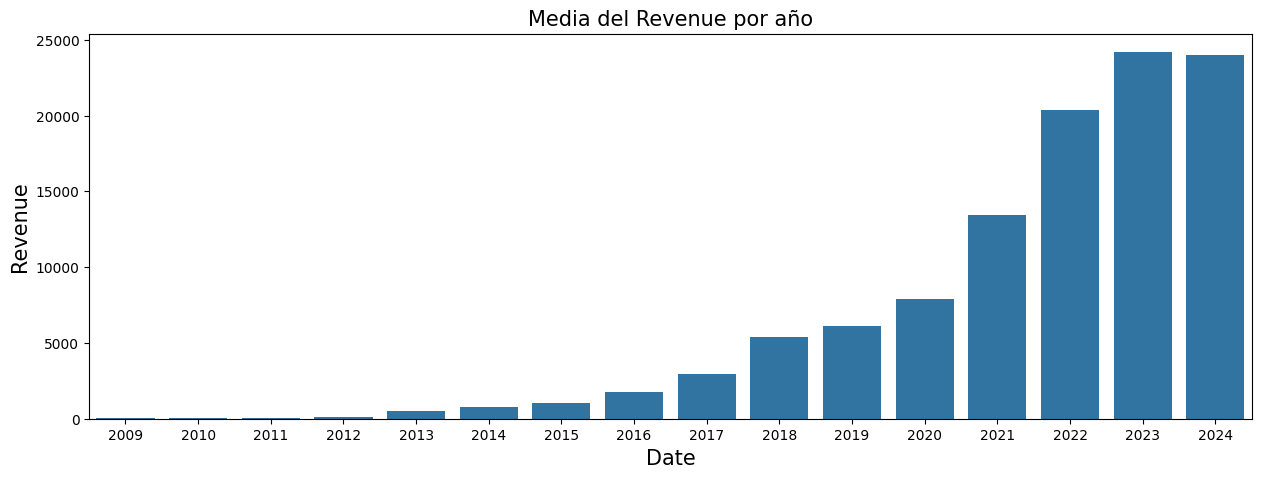

In [8]:
am = df.groupby(df["Date"].dt.year)['Value'].mean()
am = pd.DataFrame(am)

plt.figure(figsize = (15, 5))

plt.title('Media del Revenue por año', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Revenue', fontsize=15)

sns.barplot(data = am, x = "Date", y = "Value")

plt.show()


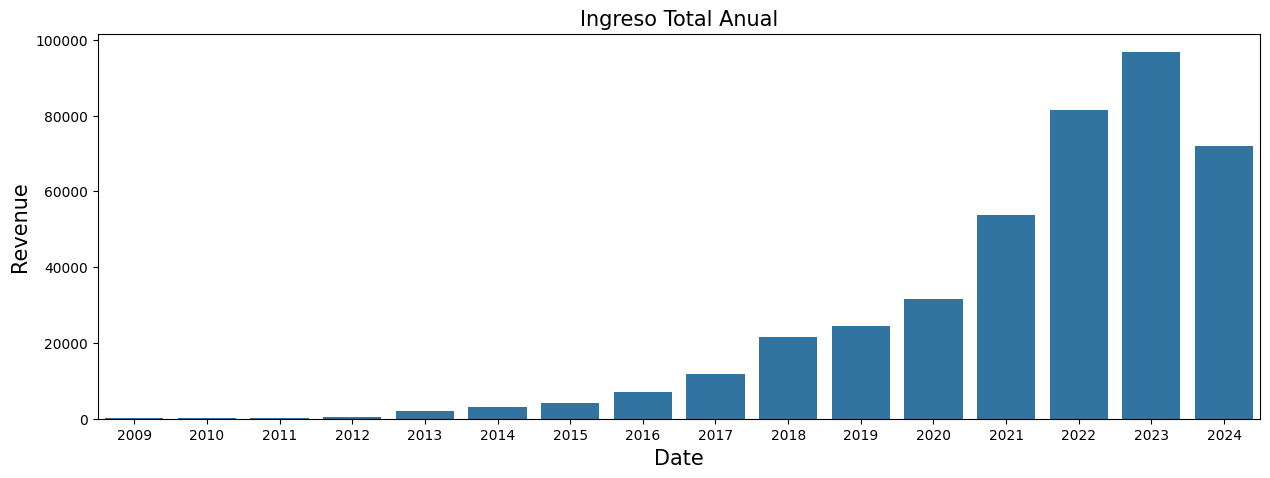

In [9]:
am = df.groupby(df["Date"].dt.year)['Value'].sum()
am = pd.DataFrame(am)

plt.figure(figsize = (15, 5))

plt.title('Ingreso Total Anual', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Revenue', fontsize=15)

sns.barplot(data = am, x = "Date", y = "Value")

plt.show()